In [4]:
import tensorflow as tf 
import tensorflow_hub as hub
import matplotlib.pyplot as plt 
import numpy as np 

In [14]:
import cv2 

In [6]:
model=hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [7]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3) #making sure our image has 3 channels
    img = tf.image.convert_image_dtype(img, tf.float32)# converting ou r image to float32
    img = img[tf.newaxis, :] #making sure our image is in an array of its own 
    return img

In [30]:
content=load_image('/Users/subrat_roy/Documents/neural_style_image_transfer/steve-lund-castle-color-final-web.jpg')
style=load_image('/Users/subrat_roy/Documents/neural_style_image_transfer/images (3).jpeg')

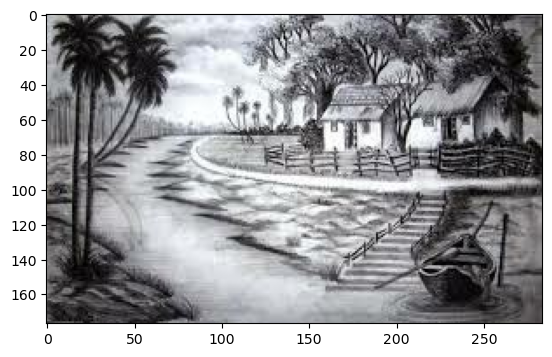

In [31]:
plt.imshow(np.squeeze(style))
plt.show()

In [32]:
stylized_image=model(tf.constant(content),tf.constant(style))[0]

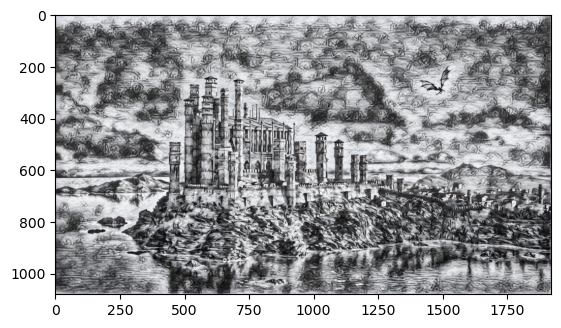

In [33]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

In [34]:
cv2.imwrite('generated_img.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))


True